In [1]:
# Set google drive folder to working directory

from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('gdrive/My Drive/Colab Notebooks/machine_learning_nd/unsupervised_learning/project')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os

if 'data' not in os.listdir():
  !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv -P 'data'

# Machine Learning Engineer Nanodegree
---
## Unsupervised Learning
---
## Project: Creating Customer Segments
---
### Getting Started
---
In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import supplementary visualizations code visuals.py
import visuals as vs

In [4]:
# Load the dataset
data = pd.read_csv('data/Wholesale customers data.csv')
data.drop(['Region', 'Channel'], axis=1, inplace=True)
print('{} samples with {} features each'.format(*data.shape))
data.head()

440 samples with 6 features each


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


### Data Exploration
In this section, we will begin exploring the data through visualizations and code to understand how each feature is related to the others. We'll observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which we will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of is important product categories: `Fresh`, `Milk`, `Grocery`, `Frozen`, `Detergets_Paper` and `Delicatessen`. Consider what each category represents in terms of products we could purchase.

In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. 

In [6]:
# Rename dataframe columns to correct 'Delicassen' to 'Delicatessen'
data.columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

# Select three indices to sample from the dataset
indices = [5,10,15]

# Create a DataFrame of chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9413,8259,5126,666,1795,1451
1,3366,5403,12974,4400,5977,1744
2,10253,1114,3821,397,964,412


### Implementation: Future Relevance
One interesting thought to consider is if one (or more) of six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, then score how well that model can predict the removed feature.

These are the steps:
* Assign to a variable a copy of the data by removing a feature of your choice using `DataFrame.drop`.
* Split the dataset into training and testing set. 
  * Use the removed feature as your target label. 
* Import a decision tree regressor and fit the learner to the training data.
* Report the prediction score of the testing set.

In [7]:
# Make a copy 'data' and drop a feature
new_data = data.drop('Detergents_Paper', axis=1, inplace=False)

# Split the data using the given feature as the target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], 
                                                    test_size=.25, 
                                                    random_state=42)

# Create a Decision Tree Regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42).fit(X_train,y_train)

# Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print('Score:', score)

Score: 0.27166698062685013


### Visualize Feature Distributions
To get a better undestanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

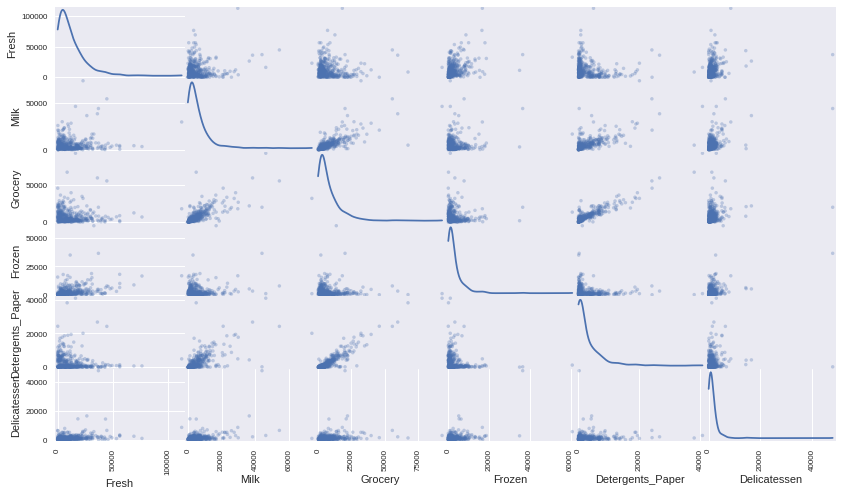

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha=.3, figsize=(14,8), diagonal='kde');
plt.show()

Is the data normally distributed? Where do most of the data points lie? We can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

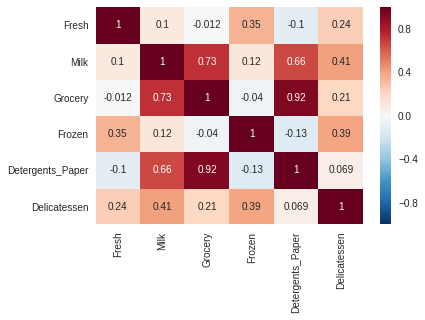

In [9]:
sns.heatmap(data.corr(), annot=True)

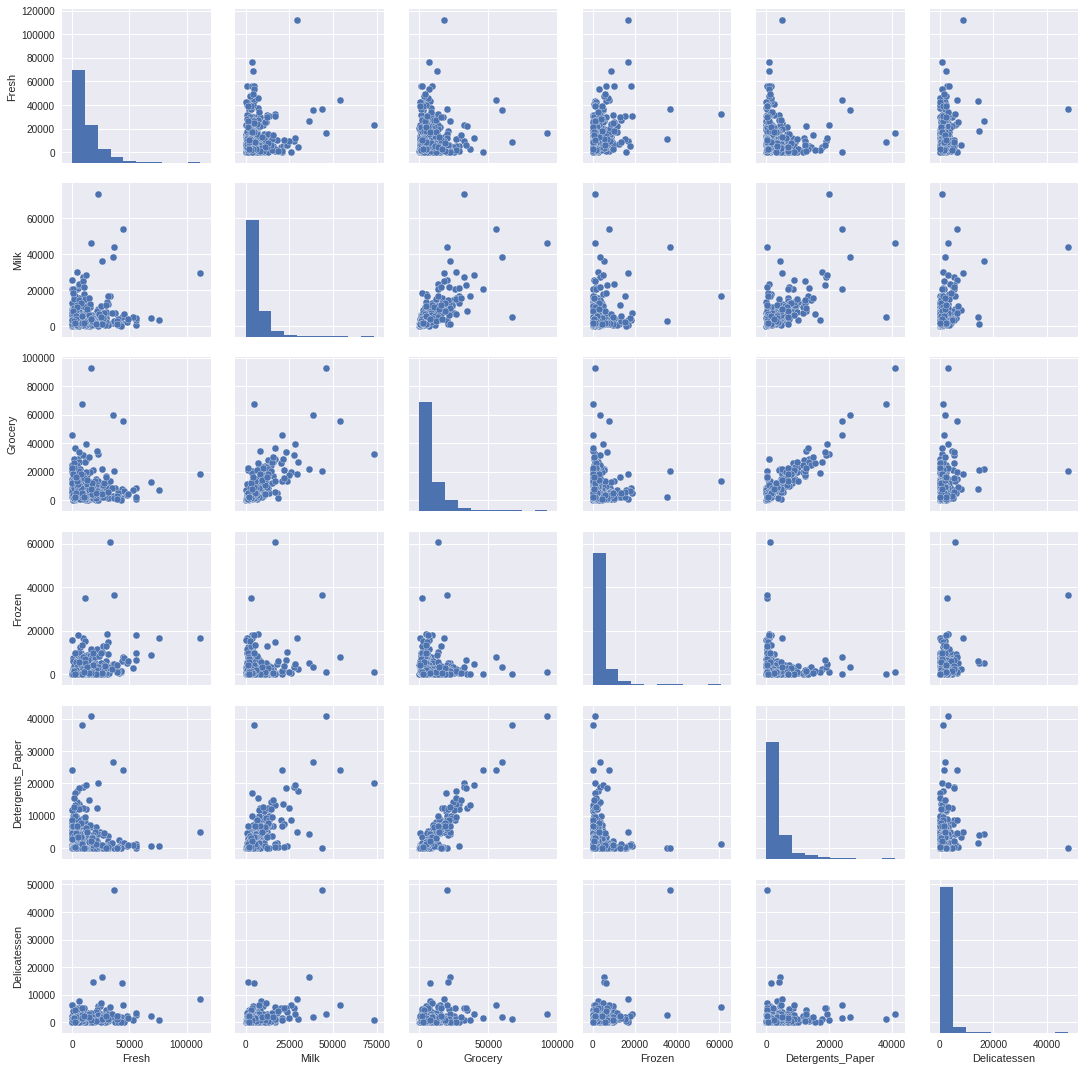

In [10]:
sns.pairplot(data)

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is ofter times a critical step in assuring that results we obtain from our analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a  [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best powe transformation of the data that reduces skewness. A simpler approach which can work in the most cases would be applying the natural logarithm.
These are the steps:
* Assign a copy of data after applying logarithmic scaling. Use the `np.log` function for this.
* Assign a copy of the sample data after applying logarithmic scaling. Again, Use use `np.log`.

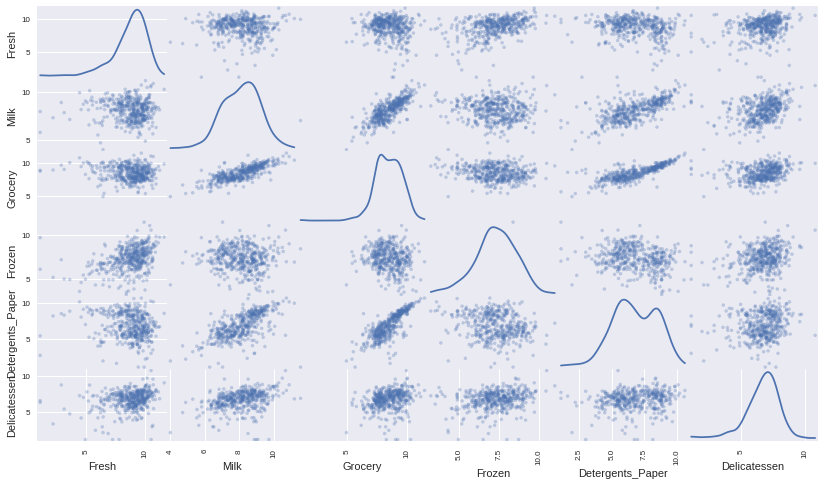

In [11]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha=.3, figsize=(14,8), diagonal='kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features we mau have identified earlier as being correlated, observe here whether that correlation is still present (and wheather it is now stronger or weaker than before).

In [12]:
log_samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.149847,9.019059,8.542081,6.501290,7.492760,7.280008
1,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
2,9.235326,7.015712,8.248267,5.983936,6.871091,6.021023


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can ofter skew results which take into consideration these data points. There're many "rules of thumb" for what constitutes an outlier in a dataset. Here, we'll use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

We must implement:
* Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
* Assign the value of 75th percentile for the given feature to `Q3`. Use `np.percentile` for this.
* Assign the calculation of an outlier step for the given feature to `step`.
* Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If we want to remove any outliers, ensure that the sample data does not contain any of these points.
Onde we have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# List of all outliers
outliers = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers)
    
    outliers += feature_outliers.index.tolist()
    
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))

Outlier step: 2.533507868606793
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Outlier step: 2.318248272818475
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Outlier step: 2.3988562137971394
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Outlier step: 2.3493275010092116
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Outlier step: 4.0893587609383335
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Outlier step: 2.2422806544219394
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Number of outliers (inc duplicates):  48
New dataset with removed outliers has 398 samples with 6 features each.


## Feature Transformation
In this section, we'll use `principal component analysis (PCA)` to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to find these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

These are the steps:
* Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in the six dimensions with `good_data` to `pca`.
* Apply PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

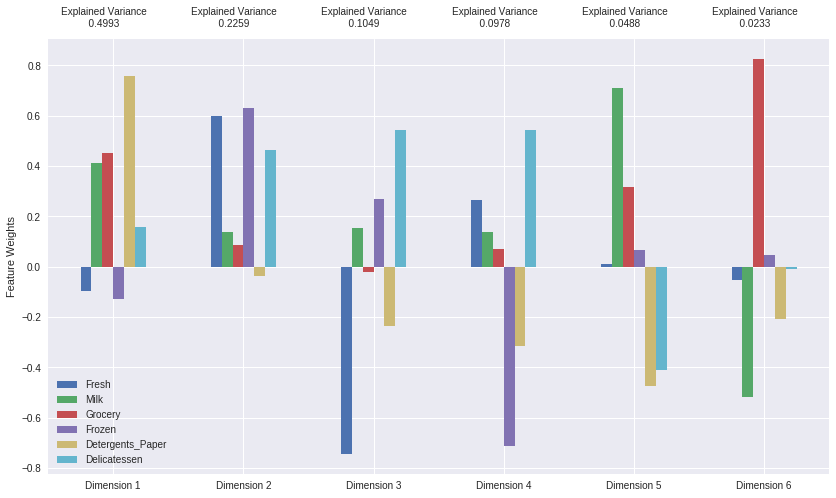

In [14]:
# Importing PCA
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6, random_state=42).fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [15]:
# Display sample log-data after having a PCA transformation applied
pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.1335,-0.1257,-0.1789,0.8899,0.0844,-0.5694
1,2.1793,0.5069,0.8243,-1.0031,-0.4516,0.3107
2,-0.4351,-1.2598,-1.2207,0.4961,-0.6487,0.3370


### Implemention: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dunebsuibs are necessary for the problem. Additionally, if a significant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

These are the steps:
* Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
* Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
* Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4993,-0.0976,0.4109,0.4511,-0.128,0.7595,0.1579
Dimension 2,0.2259,0.6008,0.1370,0.0852,0.630,-0.0376,0.4634


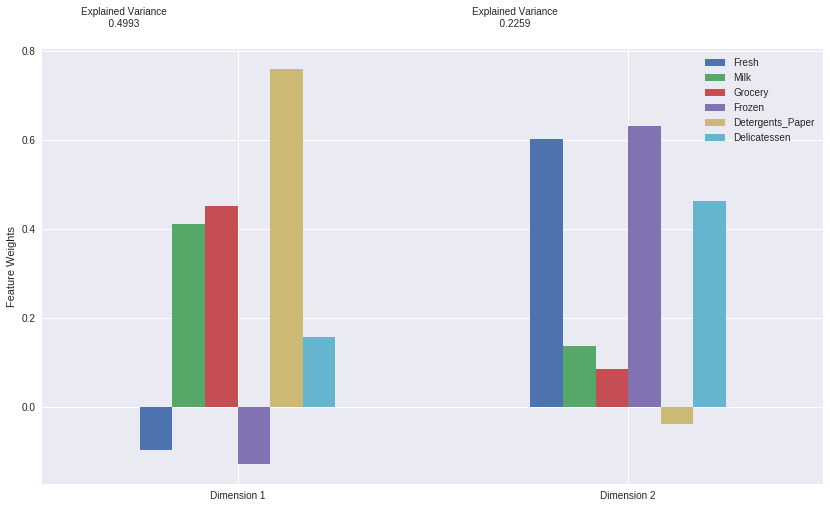

In [16]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, random_state=42).fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data.head()
vs.pca_results(good_data, pca)

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axis are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

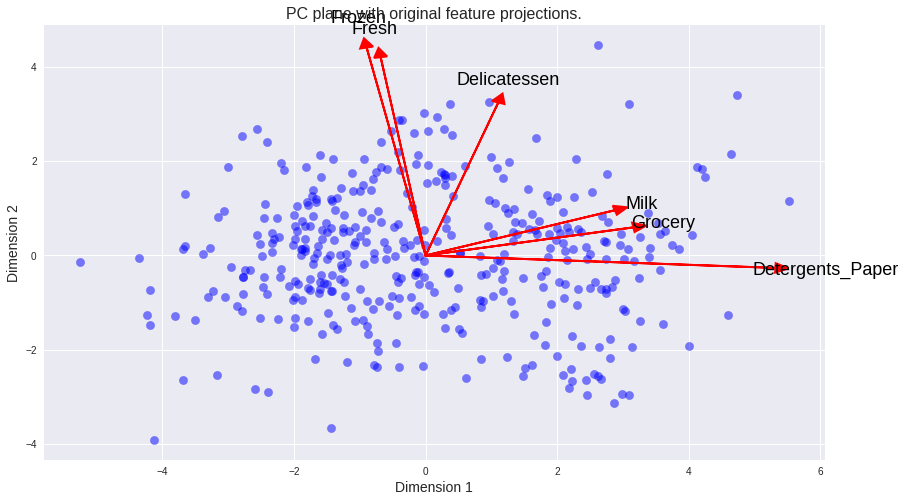

In [17]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

## Clustering
In this section, we will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. We'll then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

These are the steps:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

#### For K-Means

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def clusterKMeans(k):
  
  # Apply the K-Means algorithm to the reduced data  
  kmeans = KMeans(n_clusters=k, random_state=42).fit(reduced_data)

  # Predict the cluster for each data point
  preds = kmeans.predict(reduced_data)
  
  # Find the cluster centers
  centers = kmeans.cluster_centers_
  
  # Predict the cluster for each transformed sample data point
  sample_preds = kmeans.predict(pca_samples)
  
  # Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_data, preds)
  return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'
for k in range(2,16):
  score   = clusterKMeans(k)
  results = results.append(pd.DataFrame([score], columns=['Silhouette Score'], index=[k]))

results

Number of Clusters,Silhouette Score
2,0.447158
3,0.363986
4,0.331151
5,0.353193
6,0.363712
7,0.355334
8,0.368991
9,0.367453
10,0.345685
11,0.351355


#### For Gaussian Mixture Model

In [19]:
from sklearn.mixture import GaussianMixture

def clusterGMM(k):
  global clusterer, preds, centers, sample_preds
  # Apply the GMM algorithm to the reduced data
  gmm = GaussianMixture(n_components=k, random_state=42).fit(reduced_data)
  
  # Predict the cluster for each data point
  preds = gmm.predict(reduced_data)
  
  # Find the cluster centers
  centers = gmm.means_
  
  # Predict the cluster for each transformed sample data point
  sample_preds = gmm.predict(pca_samples)
  
  # Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_data, preds)
  return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'
for k in range(2,16):
  score   = clusterGMM(k)
  results = results.append(pd.DataFrame([score], columns=['Silhouette Score'], index=[k]))
  
results

Number of Clusters,Silhouette Score
2,0.447412
3,0.361194
4,0.318253
5,0.313057
6,0.340604
7,0.329661
8,0.329122
9,0.262685
10,0.299580
11,0.303984


### Cluster Visualization
Once we've chosen the optimal number of clusters for our clustering algorithm using the scoring metric above, we can now visualize the results by executing the code block below. Note that, for experimentation purposes, we are welcome to adjust the number of clusters for our clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

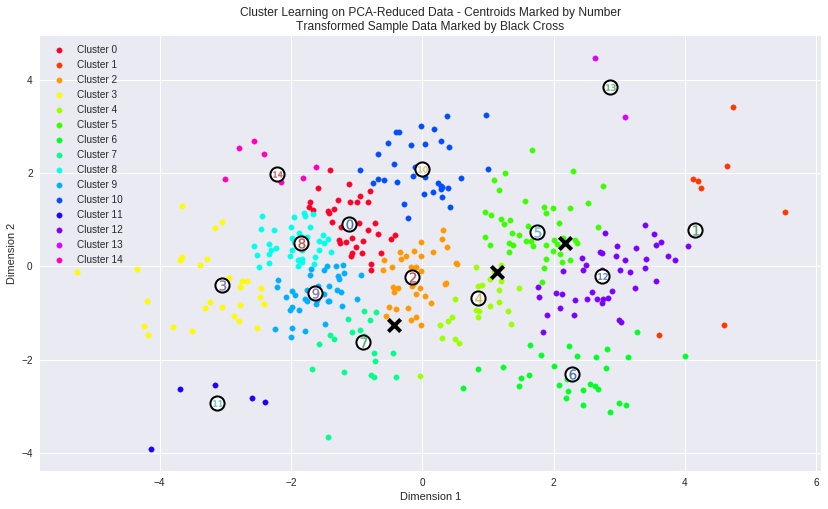

In [20]:
# Include the number of clusters to plot it
# clusterGMM(4)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

These are the steps:
 * Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 * Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [21]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments           = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers       = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments
true_centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,14511.0,2402.0,2950.0,3425.0,366.0,1142.0
Segment 1,8053.0,20668.0,31602.0,1613.0,20276.0,2483.0
Segment 2,6695.0,3061.0,4145.0,1484.0,796.0,788.0
Segment 3,8011.0,909.0,1105.0,1930.0,89.0,460.0
Segment 4,4647.0,4351.0,6278.0,986.0,1736.0,751.0
Segment 5,9974.0,7638.0,10618.0,2147.0,3253.0,1670.0
Segment 6,1528.0,6265.0,10413.0,296.0,5454.0,444.0
Segment 7,3132.0,1855.0,2618.0,682.0,472.0,368.0
Segment 8,12259.0,1690.0,2059.0,2923.0,215.0,847.0
Segment 9,6329.0,1592.0,2066.0,1454.0,262.0,534.0
